# FIFA 19 Exploratory Data Analysis and Classification

----

In this notebook, I will be running an in-depth analysis on one of my favourite FIFA games, FIFA 2019. I particularly enjoyed this release because it was the first one that featured UEFA club competitions, in particular the UEFA champions league which is a competition that I have always enjoyed watching. 

This notebook will be using a comprehensive FIFA19 player data set from Kaggle which includes over 80 player attributes. I will first be running an **exploratory data analysis** to gain a general overview and distribution of the data set and identify interesting trends and insights. Following this section, I will run a **K Nearest Neighbors clustering algorithm** to see if I can classify a subset of the dataset into different groups.

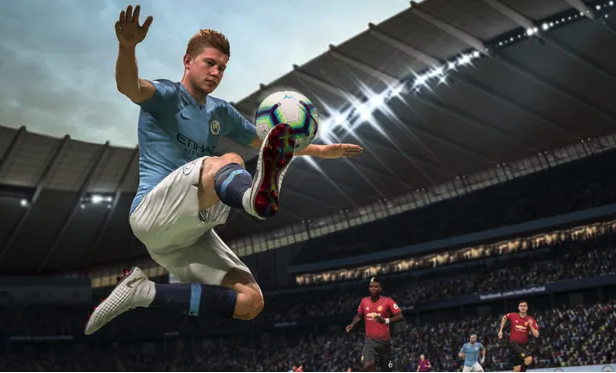

## Importing and cleaning data

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the data

In [2]:
data = pd.read_csv('~/Desktop/Kaggle Projects/fifa19_data.csv')

#### Quick summaries

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [5]:
data.shape

(18207, 89)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

#### Observations

* A quick look at the data shows that there are a lot of columns. I will not be using all of them for this analysis, so I will need to choose which attributes to leave out. 

* There are several columns with missing values, so I will need to fill those in with values depending on what is most reasonable for each attribute. 

In [8]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [9]:
data.fillna(0,inplace = True)

## Data Analysis

Let's take a look at Canadian players in FIFA19

In [10]:
Canadians = data[data['Nationality'] == 'Canada'][['Name', 'Overall', 'Position','Club']]
Canadians

,Name,Overall,Position,Club
2003,C. Larin,75,ST,Beşiktaş JK
2107,J. Hoilett,74,LM,Cardiff City
2276,L. Cavallini,74,RS,Puebla FC
2862,S. Arfield,73,LCM,Rangers FC
2984,M. Borjan,73,GK,No Club
...,...,...,...,...
17509,D. Gutiérrez,54,LM,CD Palestino
17888,S. Melvin,52,GK,Vancouver Whitecaps FC
17900,A. Daniels,51,CAM,Toronto FC
17901,J. Dunn,51,CB,Toronto FC


As we can see, the highest rated Canadian is Cyle Larin at 75. At this point in time Davies is not even in the top 5. 3 years later in FIFA22, he will go on to have a rating of 82! 

For now, let's see what his rating was back in 2019. 

In [11]:
Canadians[Canadians['Name'] == 'A. Davies'][['Name', 'Overall', 'Position']]

,Name,Overall,Position
3692,A. Davies,72,RM


What a difference! 

How about the whitecaps? 2019 was a difficult year, with a finish of dead last in the Western conference. But let's have a look at the squad and ratings.

In [12]:
Whitecaps = data[data['Club'] == 'Vancouver Whitecaps FC'][['Name', 'Position', 'Overall', 'Nationality', 'Age']]
Whitecaps

,Name,Position,Overall,Nationality,Age
2455,K. Kamara,ST,74,Sierra Leone,33
2559,K. Waston,RCB,74,Costa Rica,30
3535,Felipe,RCM,72,Brazil,27
3692,A. Davies,RM,72,Canada,17
3929,A. Ghazal,CDM,72,Egypt,26
5588,Y. Reyna,CF,70,Peru,24
5828,C. Techera,RM,69,Uruguay,26
6630,J. Mutch,CM,68,England,26
6996,E. Juárez,CM,68,Mexico,30
7203,S. Marinović,GK,68,New Zealand,26


#### Let's now take a look at the best players in each category

In [13]:
data.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [14]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],data.loc[data[pr_cols[i]].idxmax()][1]))
    i += 1

BEST IN DIFFERENT ASPECTS :
_________________________


Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Bes

## Data Visualization

#### Age Distribution

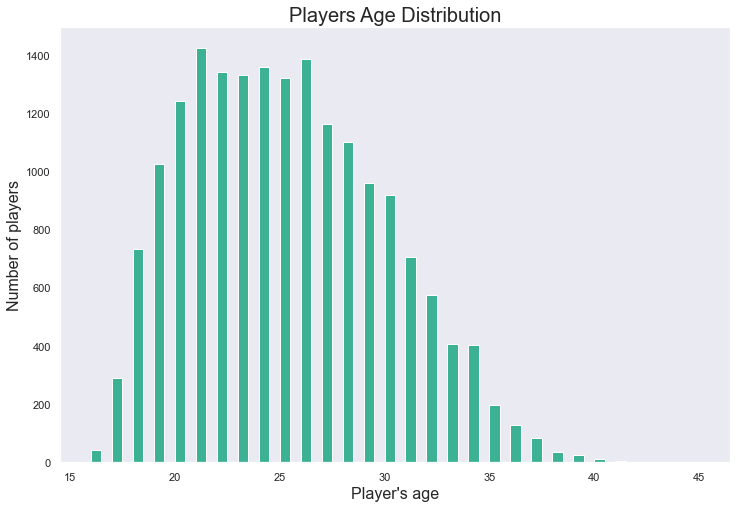

In [15]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = data.Age
plt.figure(figsize=(12,8))
ax = sns.histplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Players Age Distribution', fontsize=20)
plt.show()

Who is the oldest player in the game? 

In [16]:
oldest = data.sort_values('Age', ascending = False)[['Name', 'Nationality', 'Age']].head(1)
print(oldest)

          Name Nationality  Age
4741  O. Pérez      Mexico   45


What about the youngest?

In [17]:
youngest = data.sort_values('Age',ascending = True)[['Name', 'Nationality', 'Age']].head(1)
print(youngest)

            Name Nationality  Age
18206  G. Nugent     England   16


#### Positions

Now let's take a look at the distribution of positions

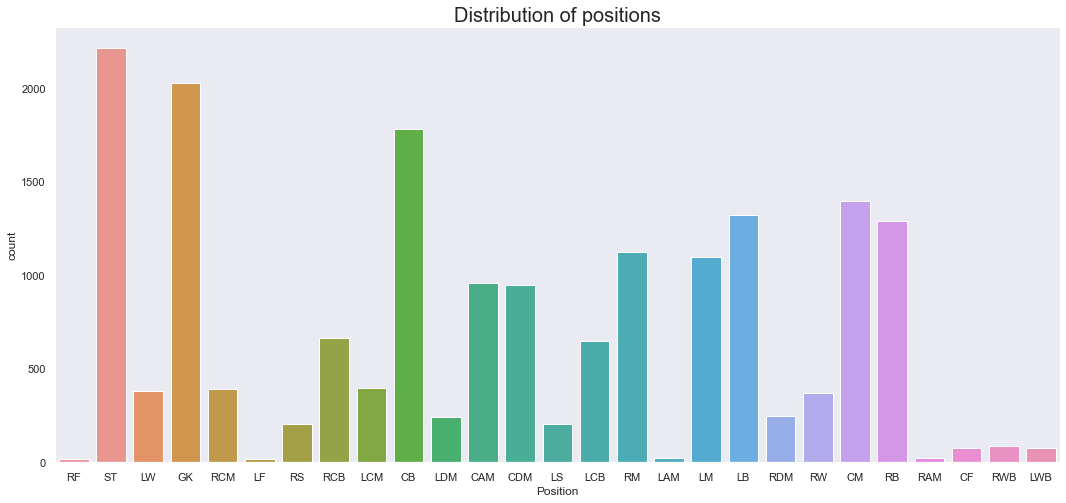

In [18]:
plt.figure(figsize = (18,8))
ax = sns.countplot(x = 'Position', data = data);
ax.set_title(label='Distribution of positions', fontsize=20);

So who are the best players for each position? 

In [19]:
data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name',
                                                               'Age', 'Club', 'Nationality']].style.background_gradient('Reds')

,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


#### Analysis on clubs

Now let's take a look at distributions and insights related to the different clubs across FIFA19

**Overall Scores**

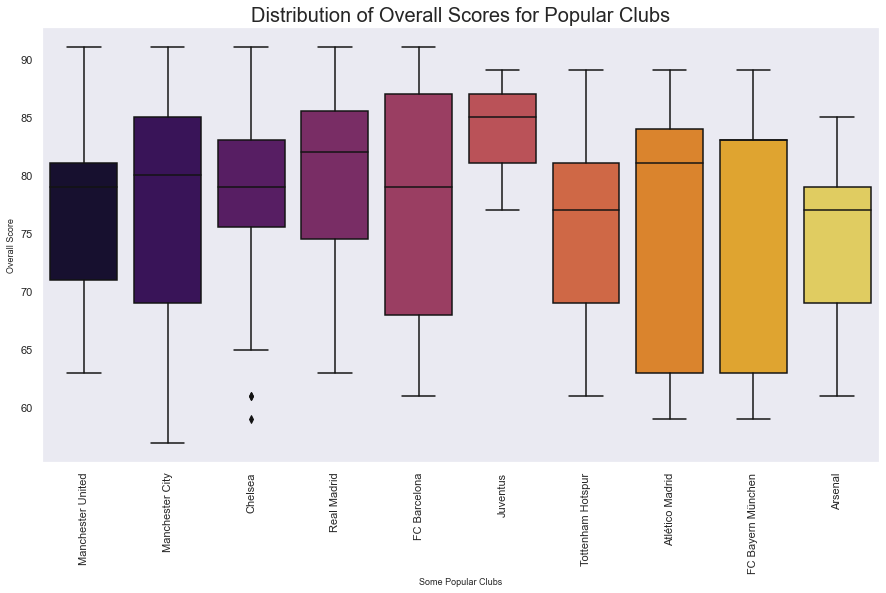

In [20]:
some_clubs = ('Arsenal','Manchester City',
             'Tottenham Hotspur', 'FC Barcelona', 'FC Bayern München', 'Manchester United', 'Chelsea', 'Real Madrid','Atlético Madrid','Juventus')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Scores for Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

**Age**

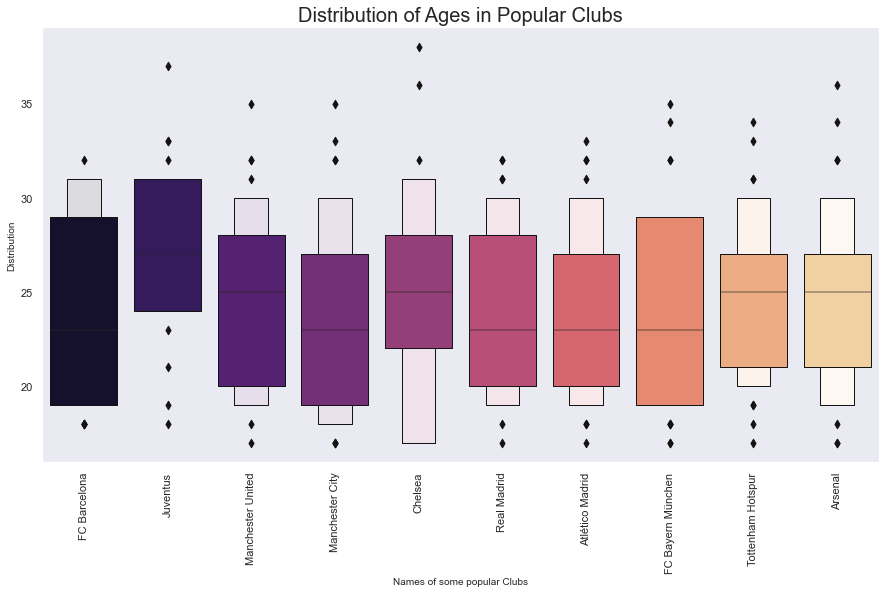

In [21]:
some_clubs = ('Arsenal','Manchester City',
             'Tottenham Hotspur', 'FC Barcelona', 'FC Bayern München', 'Manchester United', 'Chelsea', 'Real Madrid','Atlético Madrid','Juventus')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Distribution of Ages in Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Now let's look at the clubs who have the highest amount of diversity of nationalities for their players

In [22]:
nationalities = data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)
nationalities

Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
Napoli                    18
Empoli                    18
Eintracht Frankfurt       18
West Ham United           18
AS Monaco                 18
Lazio                     18
Name: Nationality, dtype: int64

And what are the most common nationalities in the game? 

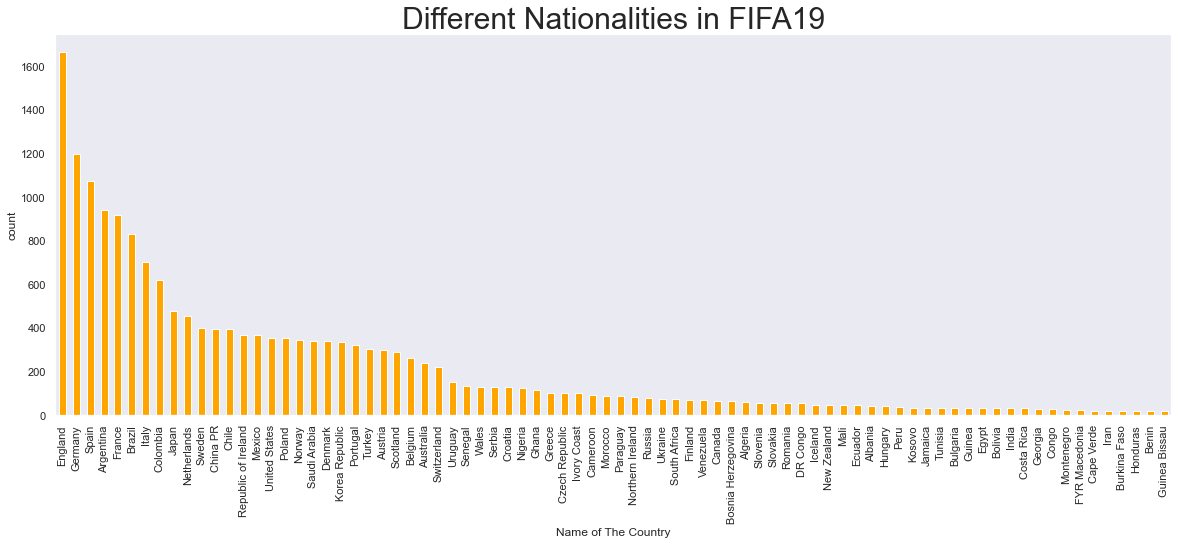

In [23]:
data['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nationalities in FIFA19', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

## Clustering

In [24]:
data.describe().columns

Index(['ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [25]:
new_data = data[['Name', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [26]:
new_data.head()

,Name,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [27]:
df = new_data[new_data.Overall > 86]
df

,Name,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,E. Hazard,27,91,91,2142,4.0,4.0,4.0,10.0,81.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
6,L. Modrić,32,91,91,2280,4.0,4.0,4.0,10.0,86.0,...,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
7,L. Suárez,31,91,91,2346,5.0,4.0,3.0,9.0,77.0,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
8,Sergio Ramos,32,91,91,2201,4.0,3.0,3.0,15.0,66.0,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
9,J. Oblak,25,90,93,1331,3.0,3.0,1.0,1.0,13.0,...,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0


In [28]:
pd.set_option('display.max_rows', 70)
df.isnull().sum()

Name                        0
Age                         0
Overall                     0
Potential                   0
Special                     0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Jersey Number               0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positioning                 0
Vision                      0
Penalties 

In [29]:
names = df.Name.tolist()
df = df.drop(['Name'], axis = 1)

In [30]:
df.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [31]:
from sklearn import preprocessing

x = df.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))

## K-Means Clustering

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)

kmeans = kmeans.fit(reduced)

labels = kmeans.predict(reduced)

centroid = kmeans.cluster_centers_

clusters = kmeans.labels_.tolist()

In [34]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.115799,-1.266128,3,L. Messi
1,-1.065857,-1.014478,3,Cristiano Ronaldo
2,-1.019252,-1.187401,3,Neymar Jr
3,2.916667,-0.518266,1,De Gea
4,-1.078129,-0.192870,0,K. De Bruyne


# Visualization

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

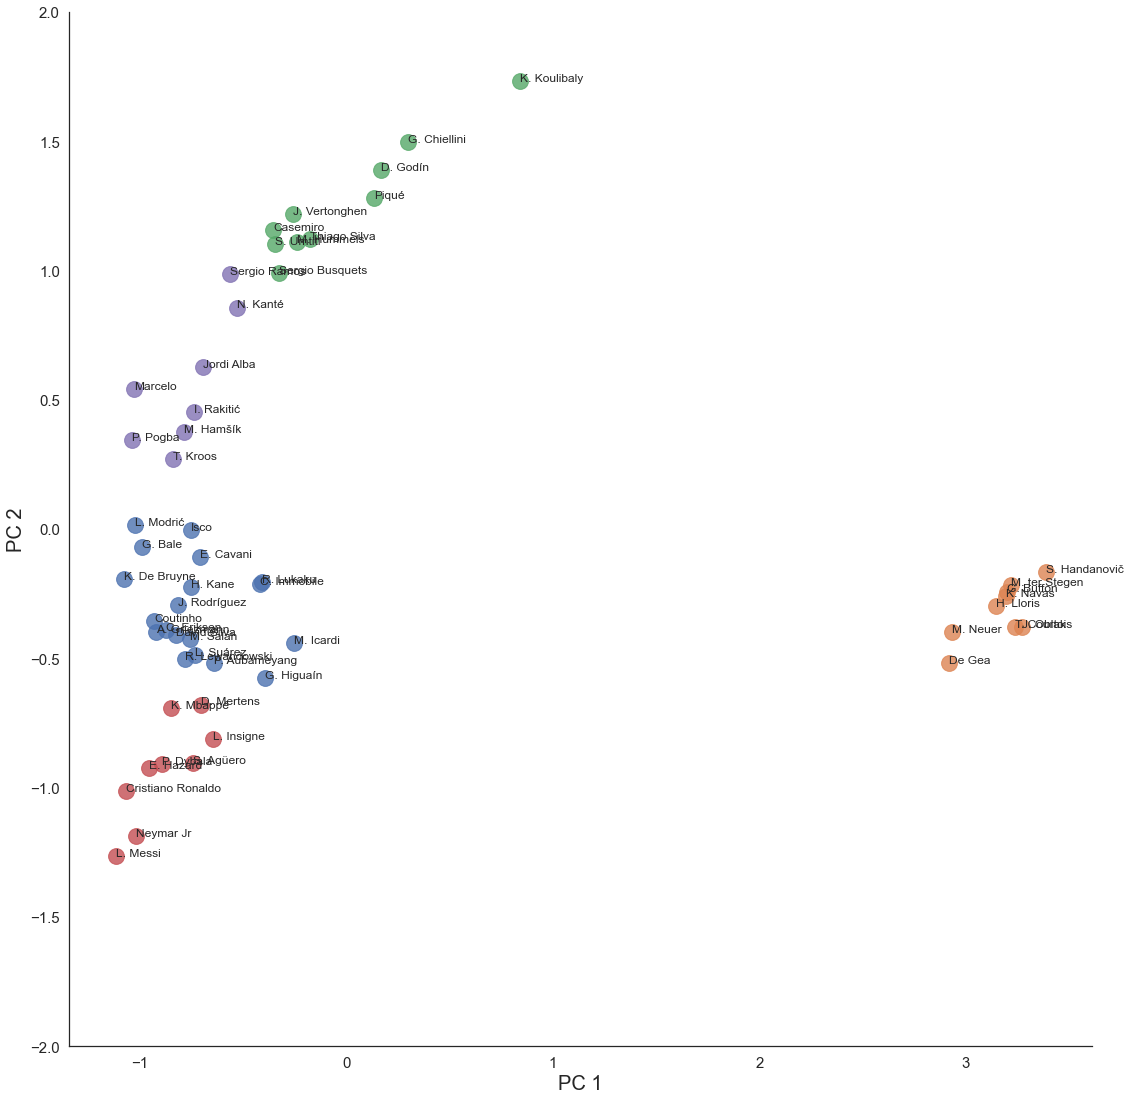

In [36]:
sns.set(style = 'white')

ax = sns.lmplot(x = 'x', y ='y', hue = 'cluster', data = reduced, legend = False, 
                fit_reg = False, height = 15, scatter_kws ={'s': 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x,y,s))
    
ax.set(ylim=(-2,2))
plt.tick_params(labelsize=15)
plt.xlabel('PC 1', fontsize = 20)
plt.ylabel('PC 2', fontsize = 20)

plt.show()